In [1]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open("all_scripts_raw.json", "r")
data = json.load(f)

In [3]:
print(data.keys())
df = pd.DataFrame(data)
df.head()

dict_keys(['DS9', 'TOS', 'TAS', 'TNG', 'VOY', 'ENT'])


,DS9,TOS,TAS,TNG,VOY,ENT
episode 0,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\nThe Voyager Transcripts - Caretaker\...,\n\n\n\n\n\nThe Enterprise Transcripts - Broke...
episode 1,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - Parallax...,\n\n\n\n\n\nThe Enterprise Transcripts - Fight...
episode 2,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - Time and...,\n\n\n\n\n\nThe Enterprise Transcripts - Stran...
episode 3,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\n\nThe Voyager Transcripts - Phage\...,\n\n\n\n\n\nThe Enterprise Transcripts - Unexp...
episode 4,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - The Clou...,\n\n\n\n\n\nThe Enterprise Transcripts - Terra...


In [4]:
for series in df:
    for ep in df[series].index:
        if type(df[series][ep]) == str:
            df[series][ep] = re.sub(r'\s+', ' ', df[series][ep].strip())

# df['DS9'][0]

In [5]:
df_scenes = df.copy()

In [6]:
s = "This is a regex test [bracket] other text [Ops] is here [test] more text [OC] this is comms [on screen] yo"
scene_regex = re.compile(r'(?=[\[]+(?!OC)+(?!on))')
scene_regex.split(s)

['This is a regex test ',
 '[bracket] other text ',
 '[Ops] is here ',
 '[test] more text [OC] this is comms [on screen] yo']

In [8]:
for series in df_scenes:
    for ep in df_scenes[series].index:
        if type(df[series][ep]) == str:
            df_scenes[series][ep] = scene_regex.split(df_scenes[series][ep])

In [9]:
df_scenes['DS9'][1][:3]

['The Deep Space Nine Transcripts - Past Prologue Past Prologue Stardate: Unknown Original Airdate: 11 Jan, 1993 ',
 "[Replimat] GARAK: It's Doctor Bashir, isn't it? Of course it is. May I introduce myself? BASHIR: Er, yes, yes, of course. GARAK: My name is Garak. Cardassian by birth, obviously. The only one of us left on this station, as a matter of fact, so I do appreciate making new friends whenever I can. You are new to this station, I believe. BASHIR: I am, yes. Though, though I understand you've been here quite a while. GARAK: Ah, you know of me then. BASHIR: Would you care for some of this Tarkalean tea? It's very good. GARAK: What a thoughtful young man. How nice that we've met. BASHIR: You know, some people say that you remained on DS Nine as the eyes and ears of your fellow Cardassians. GARAK: You don't say? Doctor, you're not intimating that I'm considered some sort of spy, are you? BASHIR: I wouldn't know, sir. GARAK: Ah. An open mind. The essence of intellect. As you may a

In [11]:
class Vocab:
    def __init__(self):
        self.words = []
        self.word_count = []
        self.df = pd.DataFrame(columns=['word', 'count'])

    def add_word(self, word):
        if word in self.words:
            self.word_count[self.words.index(word)] += 1
        else:
            self.words.append(word)
            self.word_count.append(1)

    def get_word_count(self, word):
        if word in self.words:
            return self.word_count[self.words.index(word)]
        else:
            return 0

    def rebuild_dataframe(self):
        self.df = pd.DataFrame({"word": vocab.words, "count": vocab.word_count})
        self.df.sort_values('count', ascending=False, inplace=True)

    def get_as_dataframe(self):
        return self.df

    def get_total_size(self):
        return sum(self.word_count)

    def __len__(self):
        return len(self.words)

    def get_words(self, sorted=True):
        # if sorted:
        #     return self.words.sort_values('count', ascending=False)
        # else:
        return self.words

    def tokenize(s):
        if type(s) == str:
            s = find_tokens.findall(s.lower().strip())

        tok = []
        for t in s:
            if t.isdigit():
                for d in re.findall(r'(\d)', t):
                    tok.append(tokens[d])
            elif t in tokens:
                tok.append(tokens[t])
            else:
                tok.append(tokens["<unk>"])

        return tok


    def inv_tokenize(s):
        return " ".join([words_from_token[t] for t in s])
    


In [10]:
split_words = re.compile(r'[\s\[\]\(\),.?!:]')
split_sentence = re.compile(r'(?<=[?!.])(?![\d]+)')
find_tokens = re.compile(r"[\w']+|[.,!?:;\[\]\(\)]")


In [13]:
# vocab = Vocab()

# print("Loading words...")

# for series in df:
#     for ep in df[series]:
#         if type(ep) != str:
#             continue
#         word_split = find_tokens.findall(ep.lower().strip()) #re.split(r'[\s\[\]\(\),.?!:]', ep.lower().strip())
        
#         words = [w.strip() for w in word_split if w != '' and not w.isdigit()]
#         nums = [w for w in word_split if w.isdigit()]
#         digits = []
#         for n in nums:
#             l = re.split(r'(\d)', n)
#             for d in l:
#                 if d.isdigit():
#                     digits.append(d)

#         for w in words:
#             vocab.add_word(w)

#         for w in digits:
#             vocab.add_word(w)
#     print(f"Finished loading {series}")

# print("Unique words:", len(vocab))
# print("Generating Dataframe...")
# vocab.rebuild_dataframe()
# vocab.get_as_dataframe().to_csv('all_vocab.csv')
# print("Done!")

# vocab.get_as_dataframe().head()
# re.split(r'[\s\[\]\(\),.?!:]+', df_scenes['DS9'][1][1].strip())

Loading words...
Finished loading DS9
Finished loading TOS
Finished loading TAS
Finished loading TNG
Finished loading VOY
Finished loading ENT
Unique words: 43493
Generating Dataframe...
Done!


In [14]:
voc_df = pd.read_csv("all_vocab.csv")

In [15]:
voc_df.columns = ['token', 'word', 'count']
voc_max_size = voc_df['count'].sum()
voc_df = voc_df[:12000]
voc_size = voc_df['count'].sum()

print(voc_size, voc_max_size, voc_size/voc_max_size)
voc_df.head()

4817376 4905882 0.9819592073351948


,token,word,count
0,8,.,409502
1,7,:,270065
2,12,",",169143
3,0,the,146906
4,38,to,110449


In [16]:
extra_tokens = ["<pad>", "<unk>", "<mask>", "<start>", "<end>"]

tokens = {t: i for i, t in enumerate(extra_tokens + voc_df['word'].tolist())}
words_from_token = {i: t for i, t in enumerate(extra_tokens + voc_df['word'].tolist())}
voc_size = len(tokens)
print(voc_size)

12005


In [17]:
tok = pd.DataFrame(columns=['token', 'word']).from_dict(tokens, orient='index')
tok.to_csv('tokens.csv')
tok.head()

,0
<pad>,0
<unk>,1
<mask>,2
<start>,3
<end>,4


In [12]:
def tokenize(s):
    if type(s) == str:
        s = find_tokens.findall(s.lower().strip())    
    
    tok = []
    for t in s:
        if t.isdigit():
            for d in re.findall(r'(\d)', t):
                tok.append(tokens[d])
        elif t in tokens:
            tok.append(tokens[t])
        else:
            tok.append(tokens["<unk>"])

    return tok

def inv_tokenize(s):
    return " ".join([words_from_token[t] for t in s])

test = tokenize("<start> this is a test <end>")

NameError: name 'tokens' is not defined

In [19]:
voc_df.to_csv("tokens.csv")

In [20]:
len(tokens)

12005

In [11]:
split_sentence = re.compile(r'(?<=[?!.])(?![\d]+)')
find_tokens = re.compile(r"[\w']+|[.,!?:;\[\]\(\)]")


In [22]:
s = df_scenes['DS9'][0][0].strip().lower()
print(s)
print(split_sentence.split(s))

the deep space nine transcripts - emissary emissary stardate: 46379.1 original airdate: 3 jan, 1993 on stardate 43997, captain jean-luc picard of the federation starship enterprise was kidnapped for six days by an invading force known as the borg. surgically altered, he was forced to lead an assault on starfleet at wolf 359.
['the deep space nine transcripts - emissary emissary stardate: 46379.1 original airdate: 3 jan, 1993 on stardate 43997, captain jean-luc picard of the federation starship enterprise was kidnapped for six days by an invading force known as the borg.', ' surgically altered, he was forced to lead an assault on starfleet at wolf 359.', '']


In [23]:
sentences = []
words = []
print(find_tokens.findall(s))
for sentence in split_sentence.split(s):
    sent = tokenize(sentence)
    words.extend(sent)
    sent.insert(0, tokens['<start>'])
    sent.append(tokens["<end>"])
    print(sent)
    print(inv_tokenize(sent))
    break

['the', 'deep', 'space', 'nine', 'transcripts', 'emissary', 'emissary', 'stardate', ':', '46379', '.', '1', 'original', 'airdate', ':', '3', 'jan', ',', '1993', 'on', 'stardate', '43997', ',', 'captain', 'jean', 'luc', 'picard', 'of', 'the', 'federation', 'starship', 'enterprise', 'was', 'kidnapped', 'for', 'six', 'days', 'by', 'an', 'invading', 'force', 'known', 'as', 'the', 'borg', '.', 'surgically', 'altered', ',', 'he', 'was', 'forced', 'to', 'lead', 'an', 'assault', 'on', 'starfleet', 'at', 'wolf', '359', '.']
[3, 8, 713, 291, 293, 664, 1746, 1746, 357, 6, 268, 247, 345, 400, 222, 5, 196, 523, 674, 6, 345, 4068, 7, 196, 222, 222, 345, 25, 357, 268, 345, 222, 222, 400, 7, 46, 1008, 1024, 48, 14, 8, 284, 594, 188, 39, 5033, 30, 325, 349, 99, 65, 9060, 676, 688, 53, 8, 351, 5, 4]
<start> the deep space nine transcripts emissary emissary stardate : 4 6 3 7 9 . 1 original airdate : 3 jan , 1 9 9 3 on stardate 4 3 9 9 7 , captain jean luc picard of the federation starship enterprise was

In [12]:
sentences = {}
raw_sentences = []
words = []
print("building sentence corpus...")
for series in df_scenes:
    sentences[series] = []
    for ep in df_scenes[series]:
        if type(ep) != list:
            continue

        for scene in ep:
            if type(scene) != str:
                continue
            # words.extend(split_words.split(scene.strip().lower()))
            for s in split_sentence.split(scene.strip().lower()):
                raw_sentences.append(s)     
                # sent = tokenize(s)
                # sent.insert(0, tokens['<start>'])
                # sent.append(tokens["<end>"])
                # if len(sent) > 2:
                    # sentences[series].append(sent)

                    # words.extend(sent)
                # print(find_tokens.findall(s.strip().lower()))
                

         
    print(f"Finished loading {series}")

print("Done!")   


building sentence corpus...
Finished loading DS9
Finished loading TOS
Finished loading TAS
Finished loading TNG
Finished loading VOY
Finished loading ENT
Done!


In [95]:
words = [w for w in words if w != '']
print(len(words))
print(words[0:100])

5891248
[3, 8, 713, 291, 293, 664, 1746, 1746, 357, 6, 268, 247, 345, 400, 222, 5, 196, 523, 674, 6, 345, 4068, 7, 196, 222, 222, 345, 25, 357, 268, 345, 222, 222, 400, 7, 46, 1008, 1024, 48, 14, 8, 284, 594, 188, 39, 5033, 30, 325, 349, 99, 65, 9060, 676, 688, 53, 8, 351, 5, 4, 3, 7761, 2011, 7, 43, 39, 1338, 9, 1033, 65, 2682, 25, 226, 56, 6668, 345, 355, 222, 5, 4, 3, 18, 11651, 92, 19, 9583, 18, 25, 229, 19, 6, 1632, 17, 4102, 5, 4, 3, 10, 57, 4914, 31]


In [51]:
print(inv_tokenize(sentences['DS9'][0]))

max_length = 0
for series in sentences:
    for sent in sentences[series]:
        if len(sent) > max_length:
            max_length = len(sent)
print("max length:", max_length)

<start> the deep space nine transcripts emissary emissary stardate : 4 6 3 7 9 . 1 original airdate : 3 jan , 1 9 9 3 on stardate 4 3 9 9 7 , captain jean luc picard of the federation starship enterprise was kidnapped for six days by an invading force known as the borg . <end>
max length: 78


In [13]:
import tensorflow as tf
import tqdm
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence

from transformers import GPT2Tokenizer

tf.keras.backend.clear_session()


In [37]:
def generate_skip_grams(sentences, window_size, num_ns, vocab_size, sampling_factor=1e-3, SEED=0):
    targets, contexts, labels = [], [], []
    
    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(
        vocab_size, sampling_factor=sampling_factor)

    for sentence in tqdm.tqdm(sentences):
        skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(sentence, vocabulary_size=vocab_size, 
            window_size=window_size, sampling_table=sampling_table, negative_samples=num_ns)

        for target_word, context_words in skip_grams:
            context_class = tf.expand_dims(tf.constant([context_words], dtype=tf.int64), 1)
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
                true_classes=context_class,
                num_true=1,
                num_sampled=num_ns,
                unique=True,
                range_max=vocab_size,
                seed=SEED,
                name="negative_sampling")

            # Build context and label vectors (for one target word)
            negative_sampling_candidates = tf.expand_dims(
                negative_sampling_candidates, 1)

            context = tf.concat(
                      [context_class, negative_sampling_candidates], 0)
            label = tf.constant([1] + [0]*num_ns, dtype="int64")

            # Append each element from the training example to global lists.
            targets.append(target_word)
            contexts.append(context)
            labels.append(label)

    
    return targets, contexts, labels



sg = generate_skip_grams(sentences['DS9'], window_size=1, num_ns=3, vocab_size=len(tokens), sampling_factor=1e-5 , SEED=0)


100%|██████████| 122505/122505 [08:39<00:00, 235.72it/s]


In [38]:
targets = np.array(sg[0])
contexts = np.array(sg[1])[:,:,0]
labels = np.array(sg[2])
print(targets.shape, contexts.shape, labels.shape)

(1138984,) (1138984, 4) (1138984, 4)


In [39]:
BUFFER_SIZE = 10000
BATCH_SIZE = 1024

skipgram_dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
skipgram_dataset = skipgram_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
skipgram_dataset

<BatchDataset shapes: (((1024,), (1024, 4)), (1024, 4)), types: ((tf.int32, tf.int64), tf.int64)>

In [40]:
skipgram_dataset = skipgram_dataset.prefetch(tf.data.experimental.AUTOTUNE)
print(skipgram_dataset)

<PrefetchDataset shapes: (((1024,), (1024, 4)), (1024, 4)), types: ((tf.int32, tf.int64), tf.int64)>


In [41]:
window_size = 3

# Build the sampling table for vocab_size tokens.
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(len(tokens), sampling_factor=1e-4)
print(sampling_table)

pos_skip_grams, is_neg = tf.keras.preprocessing.sequence.skipgrams(test, vocabulary_size=len(tokens),
    window_size=window_size, negative_samples=2, sampling_table=sampling_table)
print(pos_skip_grams)
print(is_neg)
print(len(pos_skip_grams))

[0.00996828 0.00996828 0.01731655 ... 1.         1.         1.        ]
[[869, 472], [420, 12146], [869, 2855], [869, 9349], [869, 11], [869, 9933], [869, 26], [26, 8479], [26, 16], [420, 11066], [420, 2269], [26, 9020], [26, 11], [420, 26], [869, 2042], [420, 16], [869, 16], [869, 8225], [420, 11], [26, 4442], [869, 9598], [26, 1618], [26, 420], [869, 10861], [869, 5309], [26, 196], [26, 9912], [26, 869], [26, 8820], [26, 7178], [420, 1229], [420, 2221], [420, 859]]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
33


In [42]:
class Word2Vec(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, samples):
    super(Word2Vec, self).__init__()
    self.target_embedding = tf.keras.layers.Embedding(vocab_size,
                                             embedding_dim,
                                             input_length=1,
                                             name="w2v_embedding")
    self.context_embedding = tf.keras.layers.Embedding(vocab_size,
                                              embedding_dim,
                                              input_length=samples)

  def call(self, pair):
    target, context = pair
    # context: (batch, context)
    if len(target.shape) == 2:
      target = tf.squeeze(target, axis=1)
    # target: (batch,)
    word_emb = self.target_embedding(target)
    # word_emb: (batch, embed)
    context_emb = self.context_embedding(context)
    # context_emb: (batch, context, embed)
    dots = tf.einsum('be,bce->bc', word_emb, context_emb)
    # dots: (batch, context)
    return dots

  def negative_sampling_loss(x_logit, y_true):
    """
    Compute the loss for negative sampling.
    """
    # x_logit: (batch, context)
    # y_true: (batch, context)
    x_logit = tf.cast(x_logit, tf.float32)
    return tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=x_logit)



In [46]:
embedding_dim = 128
word2vec = Word2Vec(len(tokens), embedding_dim, 4)
word2vec.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True) , metrics=['accuracy'])

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs/word2vec', histogram_freq=1)
H = word2vec.fit(skipgram_dataset, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
1112/1112 [==============================] - 19s 17ms/step - loss: 1.0524 - accuracy: 0.5637
Epoch 2/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.8475 - accuracy: 0.6463
Epoch 3/20
1112/1112 [==============================] - 18s 17ms/step - loss: 0.7854 - accuracy: 0.6735
Epoch 4/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.7288 - accuracy: 0.7024
Epoch 5/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.6701 - accuracy: 0.7343
Epoch 6/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.6087 - accuracy: 0.7684
Epoch 7/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.5458 - accuracy: 0.8039
Epoch 8/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.4839 - accuracy: 0.8378
Epoch 9/20
1112/1112 [==============================] - 18s 16ms/step - loss: 0.4251 - accuracy: 0.8680
Epoch 10/20
1112/1112 [==============================] - 18s 16m

In [57]:
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
print(weights.shape)
print(len(tokens))

emb = pd.DataFrame([weights[i] for i in range(len(tokens))], index=tokens)
emb.to_csv('word2vec_embedding.csv')

(12178, 128)
12178


In [49]:
emb.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
<pad>,0.026874,-0.049804,-0.040913,-0.042245,0.026275,-0.015231,-0.045740,-0.001371,-0.027052,-0.028193,...,0.023904,-0.000802,-0.020214,0.024352,0.041932,0.001481,0.038524,0.035024,0.036776,0.036592
<sep>,-0.808696,1.793078,0.018985,1.399279,1.022748,-0.577521,-1.264128,0.236296,0.445305,-0.354724,...,-0.791864,-0.377173,0.017149,1.202706,0.216141,-0.858716,-0.348016,-0.611267,-0.478441,-0.487538
<unk>,0.573022,-0.099768,-0.759066,0.123787,-0.352095,-0.504453,0.241041,0.639629,0.160775,0.275783,...,0.362448,-0.212791,0.098707,0.039922,-0.369519,-0.508871,-0.292618,0.908240,0.949985,-0.134691
<mask>,-0.048459,0.021785,-0.002477,0.009309,-0.002760,0.001185,-0.028590,0.049159,-0.003574,-0.015082,...,0.018194,-0.000781,-0.019113,-0.034744,0.010155,0.020153,0.043678,-0.033830,-0.007656,0.003803
.,-1.094318,0.385190,0.228293,0.002123,-0.431485,-0.047274,-0.268959,0.009365,-0.159678,0.691581,...,0.350256,1.107469,-0.719812,0.680427,1.287752,1.353465,0.164322,-0.064036,-0.717928,-0.396783


Text(0.5, 0, 'Epoch')

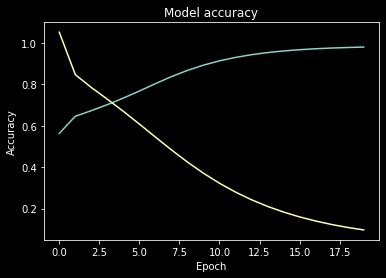

In [55]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [52]:
json.dump(sentences, open('tok_sentences.json', 'w'))

In [72]:
ds = tf.data.Dataset.from_tensor_slices([0,1,2,3,4])
for i in ds:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [53]:
seq_length = 96

padded_sentences = []
following_sentences = []
for series in sentences.keys():
    for sentence in tqdm.tqdm(sentences[series]):
        padded_sentence = [0] * seq_length
        for i, word in enumerate(sentence):
            if i >= seq_length:
                break
            padded_sentence[i] = word
        padded_sentence = np.array(padded_sentence)
        padded_sentences.append(padded_sentence)



100%|██████████| 62284/62284 [00:00<00:00, 103247.32it/s]


In [54]:
len(padded_sentences[:-1])

492682

In [55]:
padded_sent_ds = tf.data.Dataset.from_tensor_slices((padded_sentences[:-1], padded_sentences[1:]))

In [56]:
for s in padded_sent_ds.take(1):
    print(inv_tokenize(s[0].numpy()))
    print(inv_tokenize(s[1].numpy()))

<start> the deep space nine transcripts emissary emissary stardate : 4 6 3 7 9 . 1 original airdate : 3 jan , 1 9 9 3 on stardate 4 3 9 9 7 , captain jean luc picard of the federation starship enterprise was kidnapped for six days by an invading force known as the borg . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<start> surgically altered , he was forced to lead an assault on starfleet at wolf 3 5 9 . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <

In [57]:
tf.data.experimental.save(padded_sent_ds, 'padded_sentences.tfrecord', compression="GZIP")

In [58]:
record_sentences = tf.data.experimental.load('padded_sentences.tfrecord', compression='GZIP')

for s in record_sentences.take(1):
    print(s[0])

tf.Tensor(
[   3    8  713  291  293  664 1746 1746  357    6  268  247  345  400
  222    5  196  523  674    6  345 4068    7  196  222  222  345   25
  357  268  345  222  222  400    7   46 1008 1024   48   14    8  284
  594  188   39 5033   30  325  349   99   65 9060  676  688   53    8
  351    5    4    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(96,), dtype=int32)


In [59]:
len(padded_sentences)

492683

In [47]:
words_ds = tf.data.Dataset.from_tensor_slices(words)

In [98]:
sent = []
se = []
for s in words:
    # if s in tokens.keys():
    #     se.append(tokens[s])
    # else:
    #     se.append(tokens['<unk>'])
    se.append(s)
    if(len(se) == 96):
        sent.append(se)
        se = []



In [99]:
len(sent)

61367

In [100]:
comp_sent_ds = tf.data.Dataset.from_tensor_slices(sent)

In [101]:
for s in comp_sent_ds.take(1):
    print(s)

tf.Tensor(
[    3     8   713   291   293   664  1746  1746   357     6   268   247
   345   400   222     5   196   523   674     6   345  4068     7   196
   222   222   345    25   357   268   345   222   222   400     7    46
  1008  1024    48    14     8   284   594   188    39  5033    30   325
   349    99    65  9060   676   688    53     8   351     5     4     3
  7761  2011     7    43    39  1338     9  1033    65  2682    25   226
    56  6668   345   355   222     5     4     3    18 11651    92    19
  9583    18    25   229    19     6  1632    17  4102     5     4     3], shape=(96,), dtype=int32)


In [83]:
tf.data.experimental.save(
    comp_sent_ds, 'comp_sent.tfrecord', compression="GZIP")


In [14]:
raw_sentences = [s for s in raw_sentences if len(s) > 0]

In [17]:
raw_sentences[0:3]

['the deep space nine transcripts - emissary emissary stardate: 46379.1 original airdate: 3 jan, 1993 on stardate 43997, captain jean-luc picard of the federation starship enterprise was kidnapped for six days by an invading force known as the borg.',
 ' surgically altered, he was forced to lead an assault on starfleet at wolf 359.',
 '[saratoga - bridge] locutus [on viewscreen]: resistance is futile.']

In [19]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.add_special_tokens({'pad_token': '<pad>'})
vocab_length = tokenizer.vocab_size


def tokenize(s, max_len=128):
    tok = tokenizer.encode(s)
    return tf.constant(tok, dtype=tf.int32)


In [20]:
raw_gpt_tokens = []
for s in tqdm.tqdm(raw_sentences):
    raw_gpt_tokens.append(tokenize(s))

100%|██████████| 492686/492686 [00:57<00:00, 8635.14it/s]


In [41]:
combined_sentences = []
scratch = []
for s in tqdm.tqdm(raw_gpt_tokens):
    if (len(scratch) + len(s)) < 128:
        scratch = tf.concat([scratch, s], axis=0)
        # print(scratch)
    else:
        scratch = tf.concat(
                [scratch, [tokenizer.pad_token_id]*(128 - len(scratch))], axis=0)
        s = tf.concat([s, [tokenizer.pad_token_id]*((128 - len(s)))], axis=0)
        combined_sentences.append((scratch, s))
        scratch = []
        # break


100%|██████████| 492686/492686 [00:17<00:00, 27867.82it/s]


In [42]:
combined_sentences[0]

(<tf.Tensor: shape=(128,), dtype=int32, numpy=
 array([ 1169,  2769,  2272,  5193, 29351,   532,   795,   747,   560,
          795,   747,   560,   336,   446,   378,    25,  6337, 29088,
           13,    16,  2656,   257,  1447,   378,    25,   513, 42897,
           11,  9656,   319,   336,   446,   378,  5946, 39647,    11,
        10654,   474, 11025,    12,    75,  1229,  8301,   446,   286,
          262, 36986, 48744, 13953,   373, 23384,   329,  2237,  1528,
          416,   281, 33827,  2700,  1900,   355,   262,   275,  2398,
           13, 19797,  1146, 14294,    11,   339,   373,  4137,   284,
         1085,   281,  4641,   319,  3491, 33559,   379, 17481, 41934,
           13,    58,    82, 34174, 10949,   532,  7696,    60,  1179,
          315,   385,   685,   261,  1570,  9612,  5974,  6625,   318,
        35322,    13,   345,   481, 35526,   534,  3777,   290, 27675,
          514,   284,  6567,  6632,  6632,   530,    13,   611,   345,
         2230,   284, 22432,  

In [43]:
raw_sentences_ds = tf.data.Dataset.from_tensor_slices(combined_sentences)


In [44]:
tf.data.experimental.save(
    raw_sentences_ds, 'sentences_combined_gpttokens.tfrecord', compression="GZIP")
